<div style="text-align: center;">
    <strong><h2>Website Performance Analysis </h2></strong>
</div>

<div style="text-align: center;">
    <strong><h2>Riddhi Jain </h2></strong>
</div>

In [23]:
#Import the dataset
import pandas as pd
data = pd.read_csv("C:\\Users\\hp\\Downloads\\data-export.csv")
print(data.head())

          # ----------------------------------------  \
0  Session primary channel group (Default channel...   
1                                             Direct   
2                                     Organic Social   
3                                             Direct   
4                                     Organic Social   

                 Unnamed: 1 Unnamed: 2 Unnamed: 3        Unnamed: 4  \
0  Date + hour (YYYYMMDDHH)      Users   Sessions  Engaged sessions   
1                2024041623        237        300               144   
2                2024041719        208        267               132   
3                2024041723        188        233               115   
4                2024041718        187        256               125   

                            Unnamed: 5                 Unnamed: 6  \
0  Average engagement time per session  Engaged sessions per user   
1                   47.526666666666700         0.6075949367088610   
2                    32.09737

In [24]:
new_header = data.iloc[0] #grab the 1st row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header
data.reset_index(drop=True, inplace=True)
print(data.head())

0 Session primary channel group (Default channel group)  \
0                                             Direct      
1                                     Organic Social      
2                                             Direct      
3                                     Organic Social      
4                                     Organic Social      

0 Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
0               2024041623   237      300              144   
1               2024041719   208      267              132   
2               2024041723   188      233              115   
3               2024041718   187      256              125   
4               2024041720   175      221              112   

0 Average engagement time per session Engaged sessions per user  \
0                  47.526666666666700        0.6075949367088610   
1                   32.09737827715360        0.6346153846153850   
2                   39.93991416309010        0.6117021276595740   
3   

In [25]:
data.info() #column info and summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [26]:
print(data.describe())

0      Session primary channel group (Default channel group)  \
count                                                3182      
unique                                                  7      
top                                                Direct      
freq                                                  672      

0      Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
count                      3182  3182     3182             3182   
unique                      672   147      180              103   
top                  2024042417     1        1                0   
freq                          6   335      340              393   

0      Average engagement time per session Engaged sessions per user  \
count                                 3182                      3182   
unique                                2823                       808   
top                                      0                         0   
freq                                   170             

In [27]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

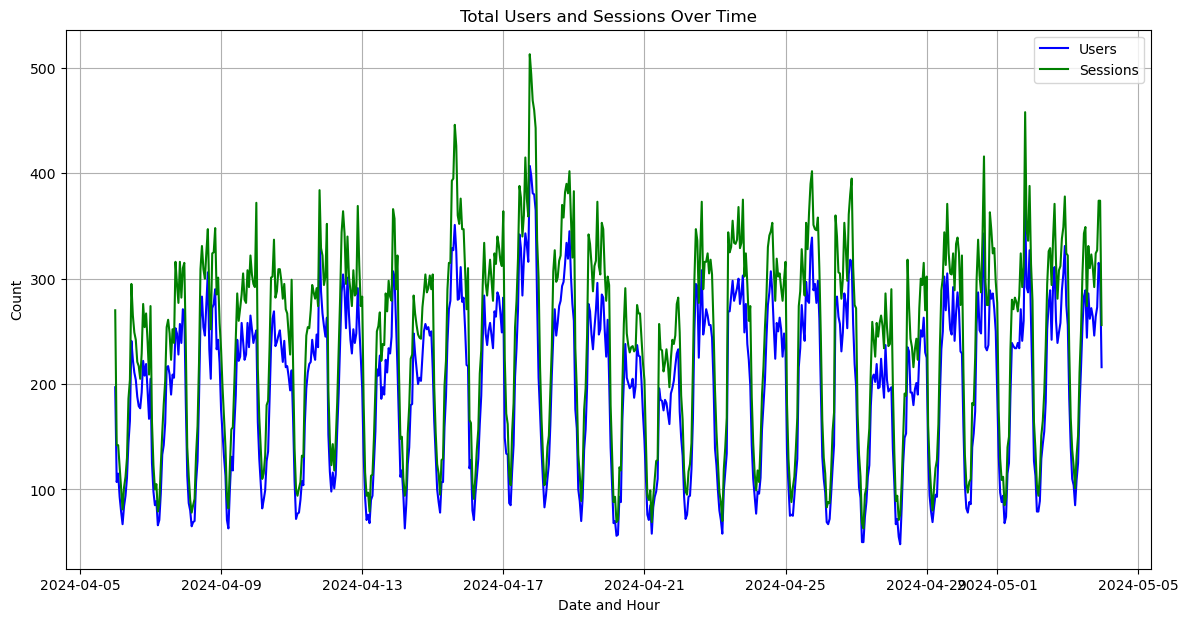

In [28]:
#analyse the total users and sessions over time
import matplotlib.pyplot as plt

# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# User Engagement Analysis(to evaluate how engaged users are when they visit the site)

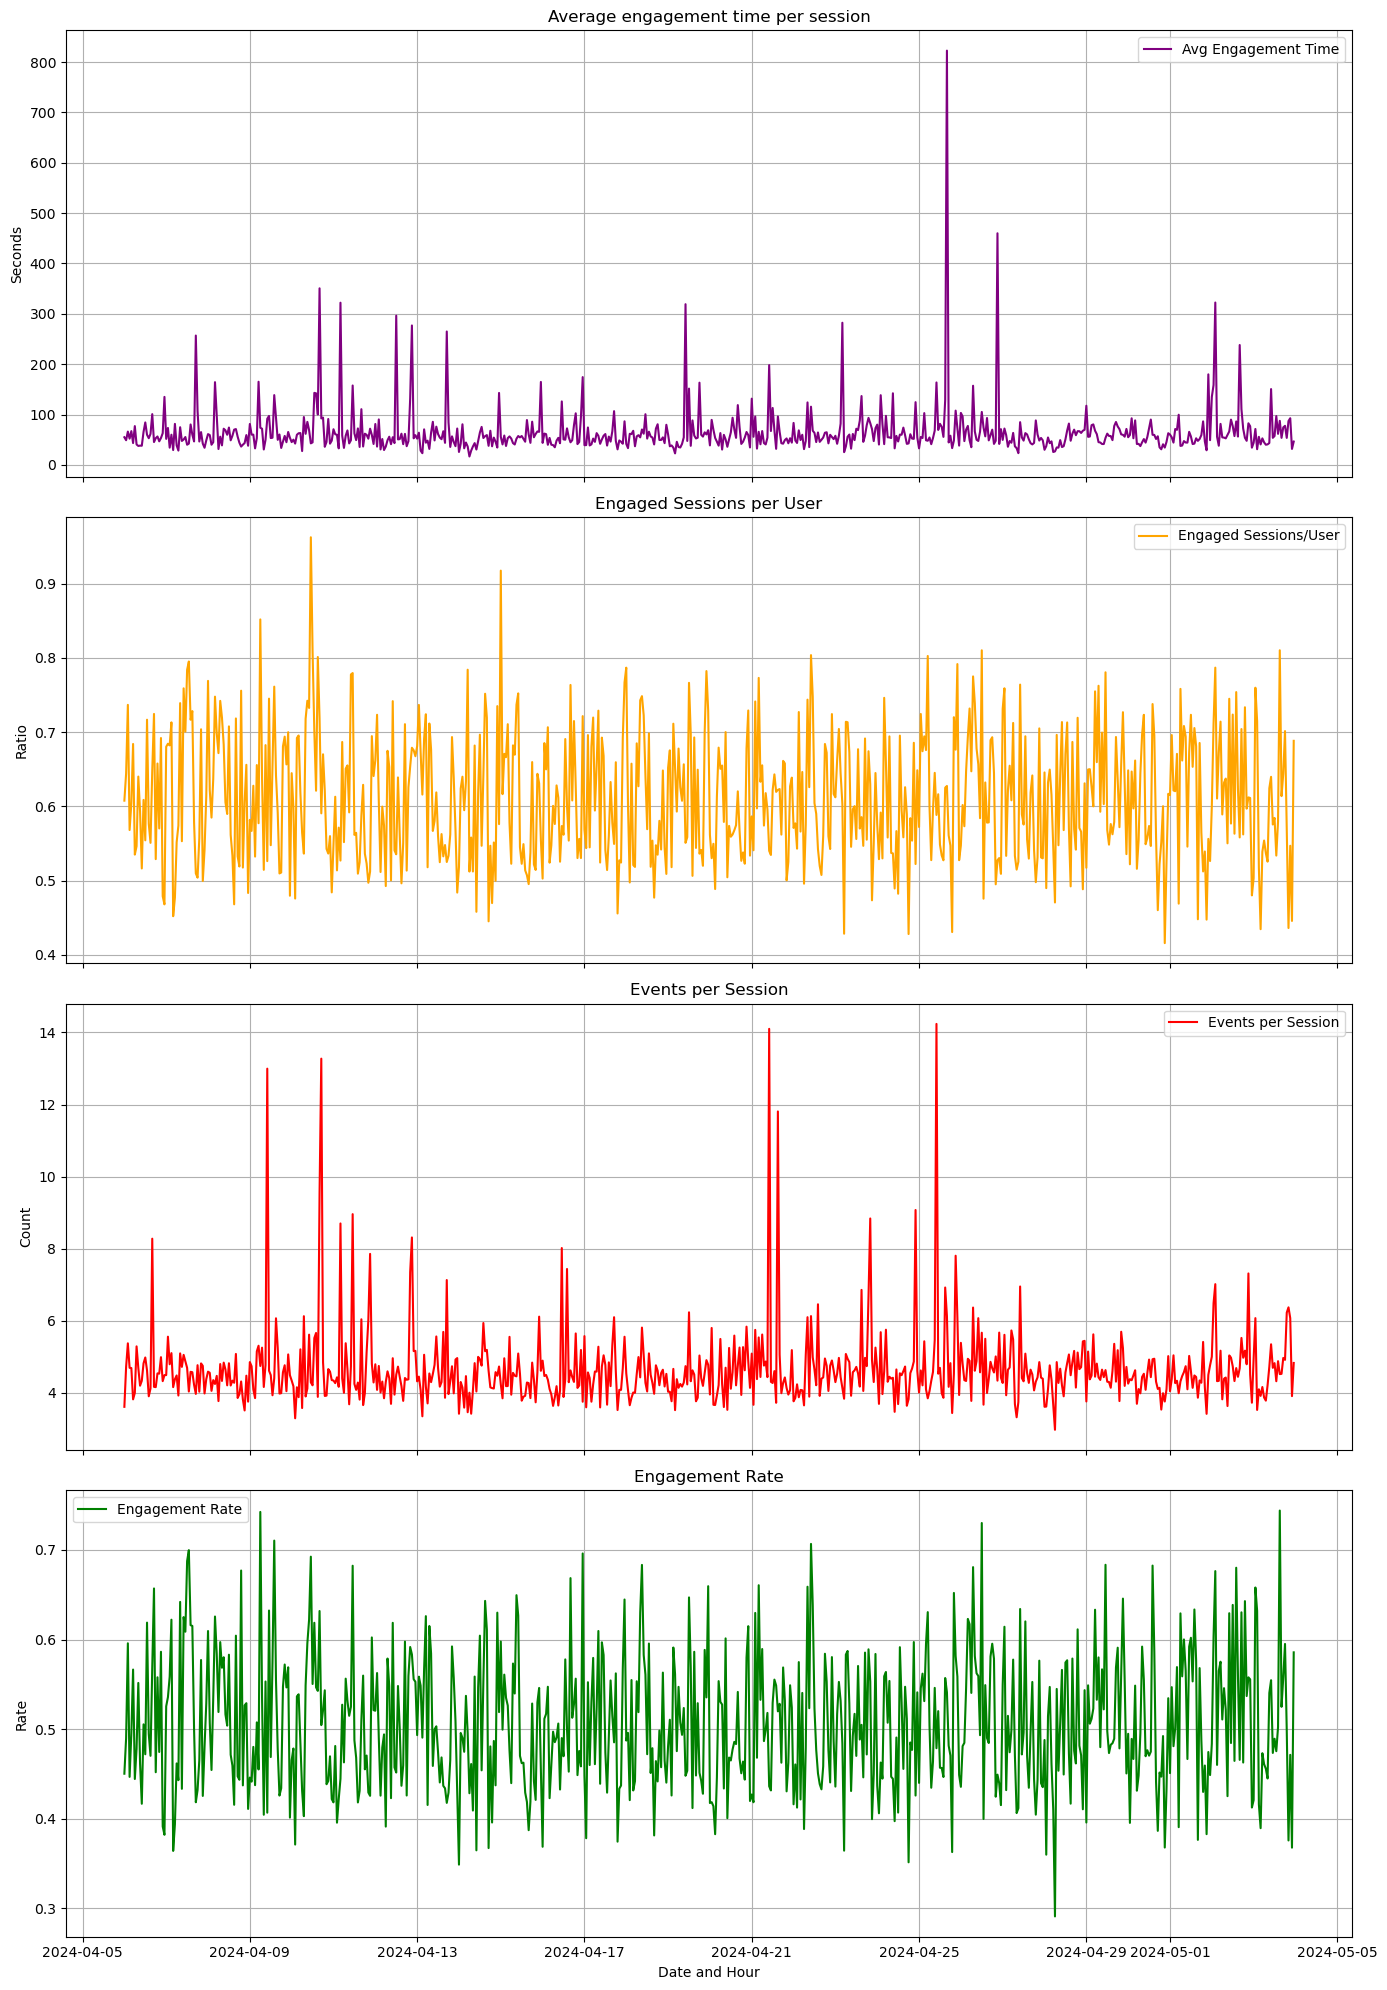

In [29]:
#convert relevant col to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

#group data by date and calc mean for engaged metrics
engaged_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user' : 'mean',
    'Events per session' : 'mean',
    'Engagement rate' : 'mean'
})

#plotting engagement  metrics 
fig, ax = plt.subplots(4,1, figsize = (14,20), sharex = True)

ax[0].plot(engaged_metrics.index, engaged_metrics['Average engagement time per session'], label = 'Avg Engagement Time', color = 'purple')
ax[0].set_title('Average engagement time per session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engaged_metrics.index, engaged_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engaged_metrics.index, engaged_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engaged_metrics.index, engaged_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout() #subplots arraged without overlapping
plt.show()

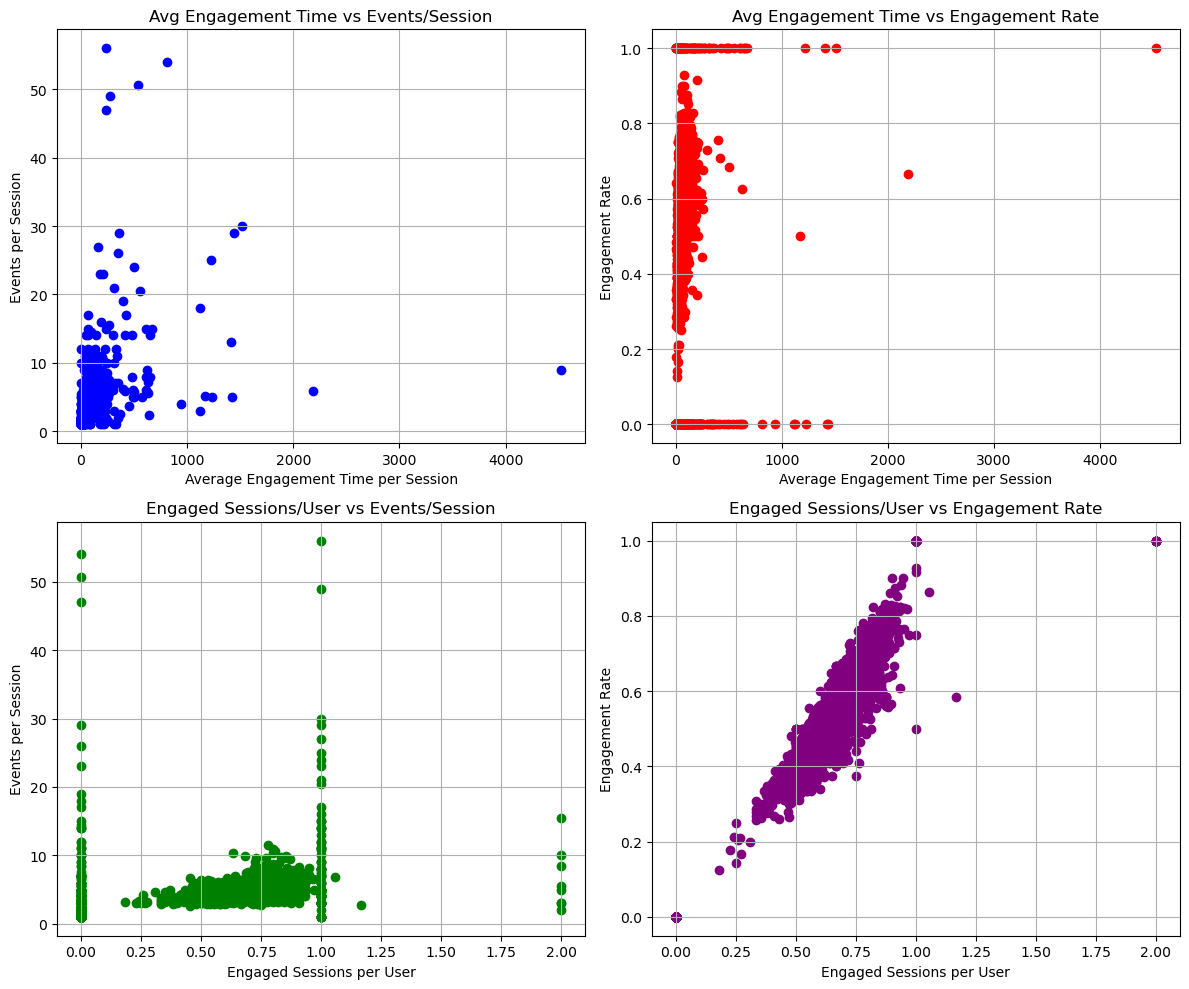

In [30]:
#Analizing the correlation between eachother

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  #enable grid

# plot2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Channel Performance Analysis

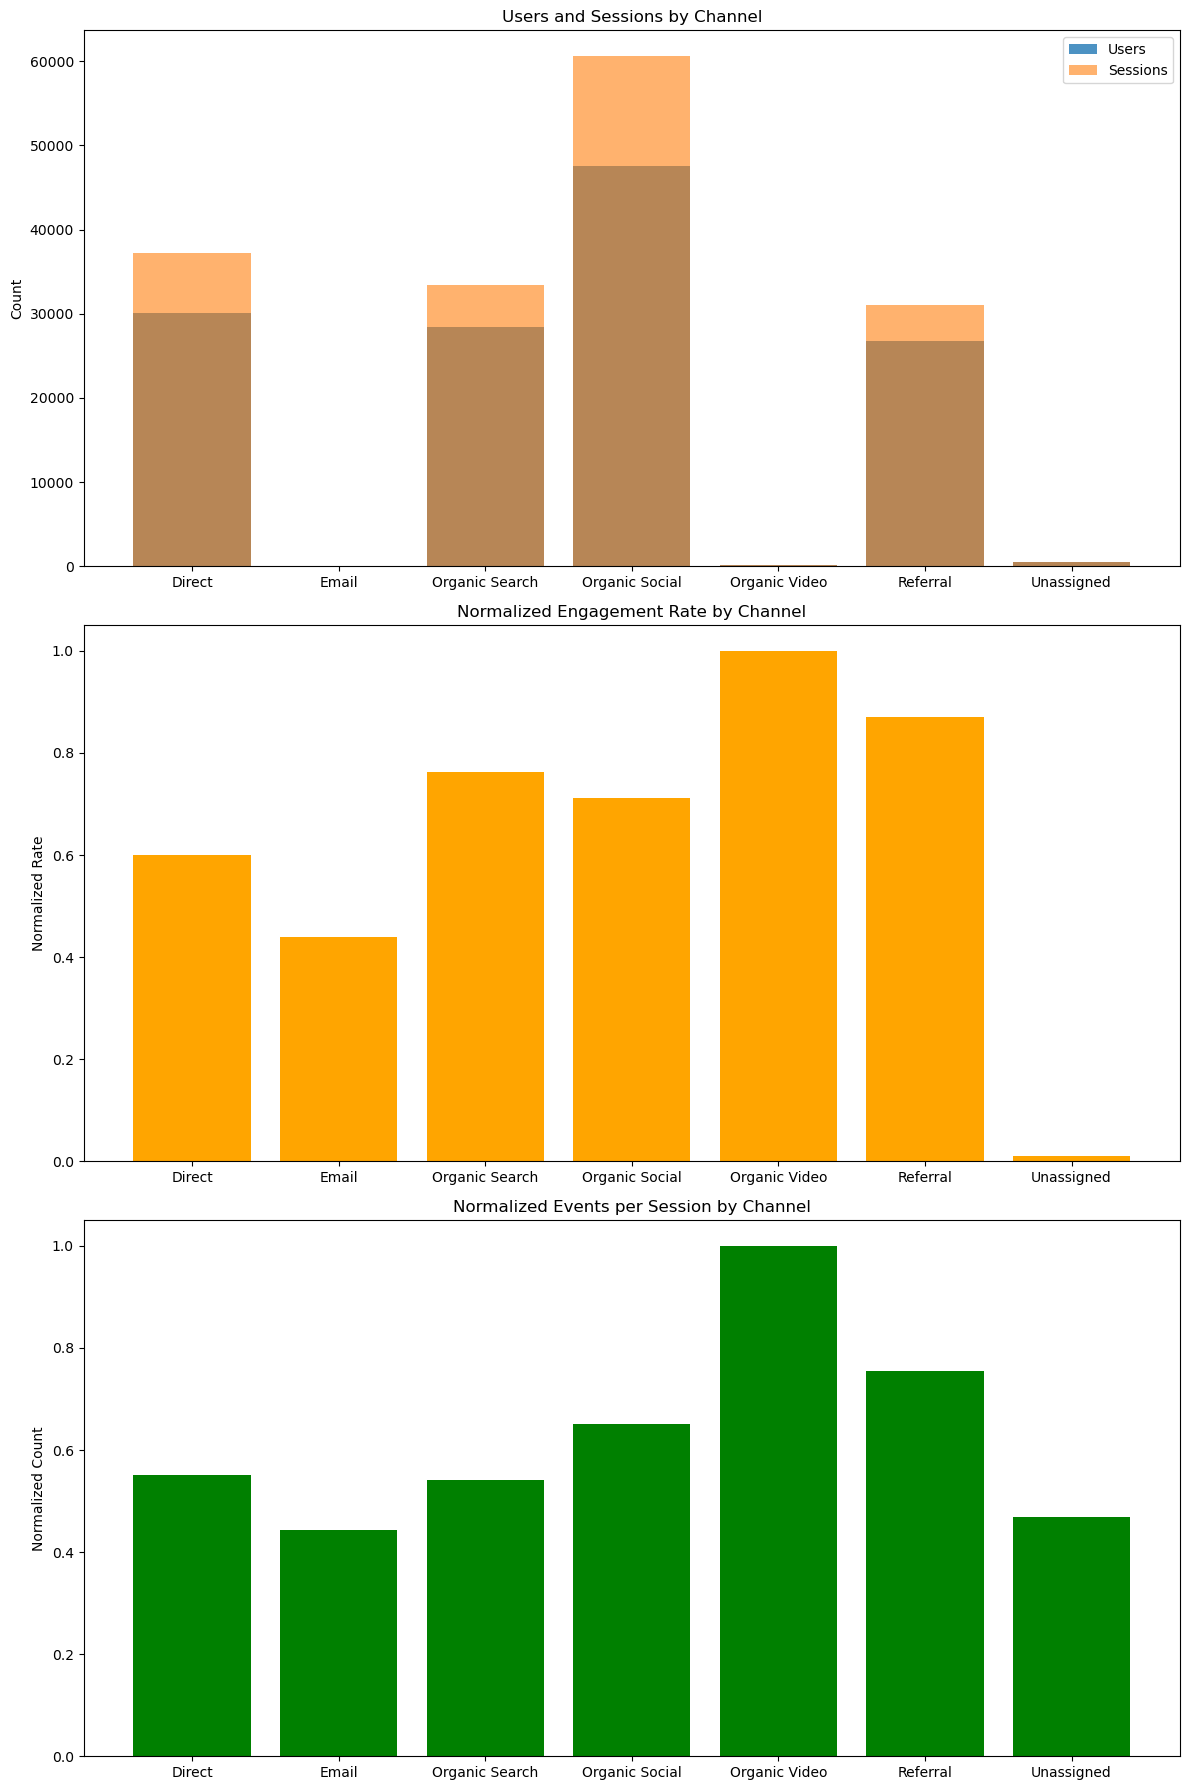

In [31]:
#We will conduct a Channel Performance Analysis to assess traffic and engagement by analyzing session, user, and engagement data segmented by marketing channel.

# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

#This code analyzes the performance of different marketing channels by aggregating user,
#session, and engagement metrics, normalizing key metrics for comparison & visualization.



# Forecasting Website Traffic

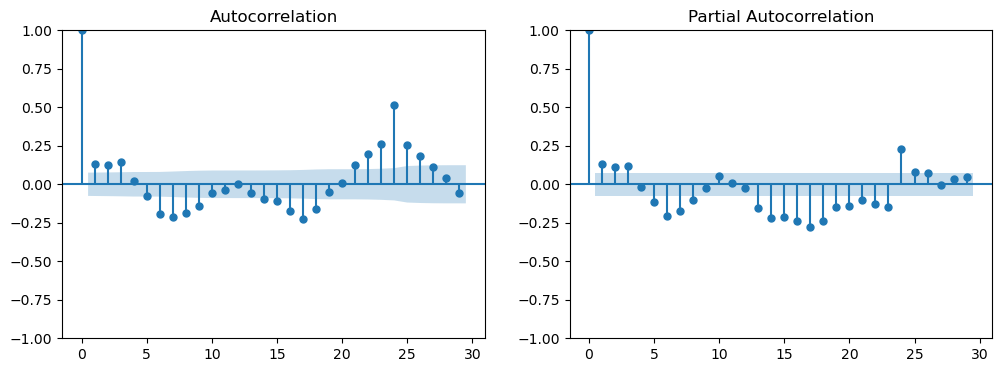

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #this library are used to create the autocorrelation and partial autocorrelation plots
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill') #setting its frequency to hourly (H), 
seasonal_period = 24 #indicating a daily seasonal pattern
differenced_series = time_series_data.diff().dropna() #Differencing the time series helps to make it stationary (i.e removing trends and seasonality)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

#PACF- The PACF plot shows a significant spike at lag 1, suggesting that the AR part of the model should be of order 1, so p=1.
#ACF- The ACF plot shows a significant spike at lag 1 and a gradual tailing off, suggesting an MA component. Although the tailing off complicates the exact determination, starting with q=1 is reasonable.

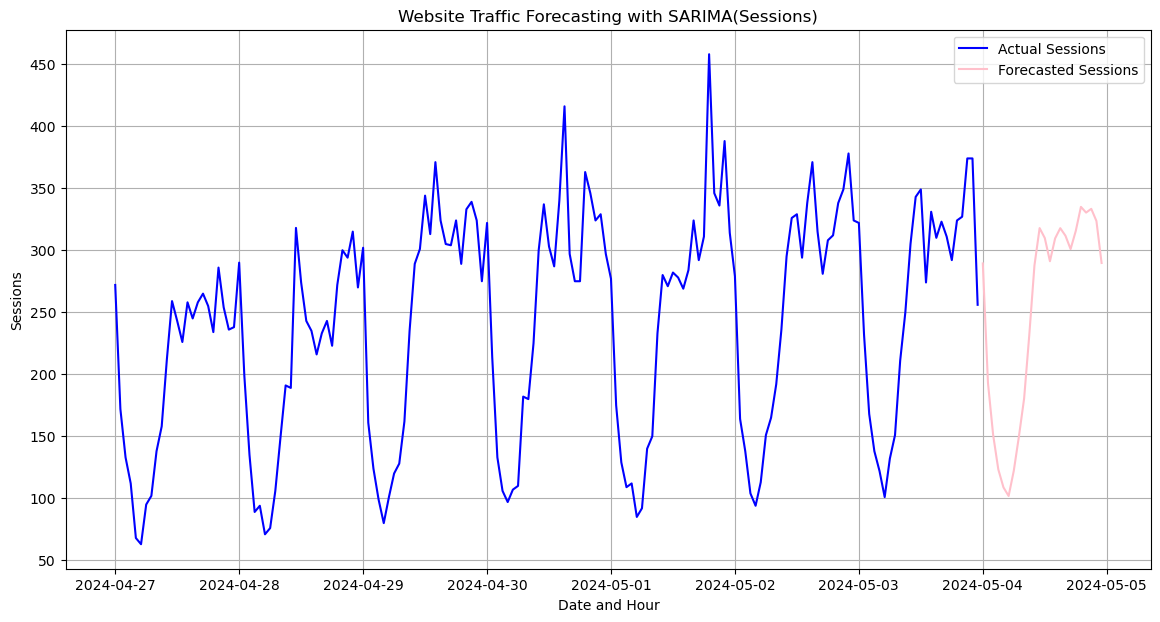

In [22]:
#Importing the SARIMAX model:(create and fit the SARIMA model)
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method= 'ffill') #preparing time series data
seasonal_period = 24 #setting the seasonal period


sarima_model = SARIMAX(time_series_data, 
                      order=(1,1,1), #ARIMA part with p=1, d=1, and q=1
                      seasonal_order=(1,1,1,seasonal_period)) #seasonal component with seasonal AR=1, seasonal differencing=1, seasonal MA=1, and a seasonal period of 24
sarima_model_fit = sarima_model.fit()

#forecasting the next 24 hours
sarima_forecast = sarima_model_fit.forecast(steps=24)

#plotting actual data and the SARIMA forecast
plt.figure(figsize=(14,7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue') #last week data
plt.plot(pd.date_range(time_series_data.index[-1],periods=25,freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='pink')
plt.title('Website Traffic Forecasting with SARIMA(Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()